In [1]:
pip install yfinance pandas numpy matplotlib seaborn scikit-learn statsmodels pmdarima


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 17.5 MB/s eta 0:00:00


In [2]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from statsmodels.tsa.arima.model import ARIMA
from pmdarima import auto_arima
import warnings

warnings.filterwarnings("ignore")

Step 1: Collect Historical Data for WTI and Brent Crude

In [4]:
tickers = {
    'WTI': 'CL=F',        # WTI crude oil futures
    'Brent': 'BZ=F',      # Brent crude oil futures
}

def download_data(tickers, start_date='2010-10-01', end_date='2024-10-01'):
    data = {}
    for name, ticker in tickers.items():
        data[name] = yf.download(ticker, start=start_date, end=end_date)['Adj Close']
    return pd.DataFrame(data)
data = download_data(tickers)
data.head()
print(data.head())

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

                  WTI      Brent
Date                            
2010-10-01  81.580002  83.750000
2010-10-04  81.470001  83.279999
2010-10-05  82.820000  84.839996
2010-10-06  83.230003  85.059998
2010-10-07  81.669998  83.430000


 Step 2: Cleaning of Data (Proper handling of Missing Values and Outliers)

In [5]:
data_clean = data.dropna()
z_scores = np.abs((data_clean - data_clean.mean()) / data_clean.std())
data_clean = data_clean[(z_scores < 3).all(axis=1)]


Step 3: Exploratory Data Analysis

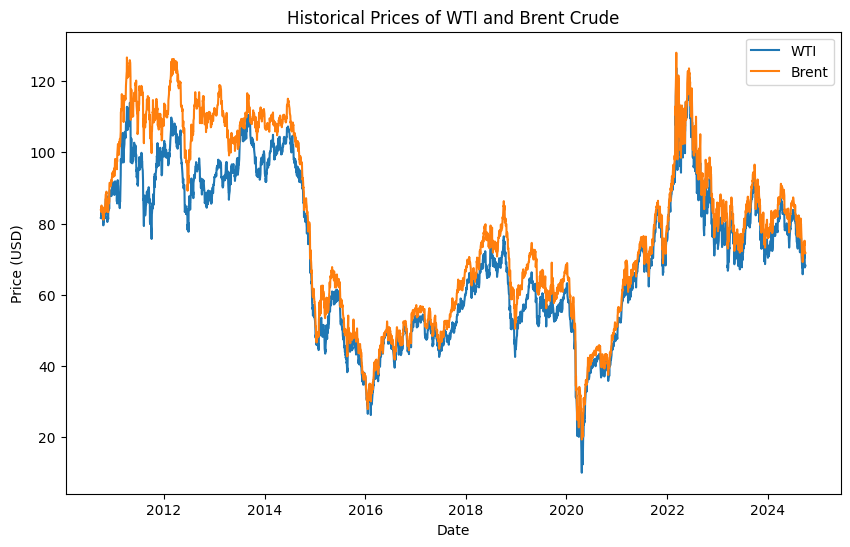

               WTI        Brent
count  3489.000000  3489.000000
mean     71.547099    78.193726
std      21.934263    24.880118
min      10.010000    19.330000
25%      52.470001    57.389999
50%      71.779999    76.690002
75%      90.820000   103.160004
max     123.699997   127.980003


<Figure size 1000x600 with 0 Axes>

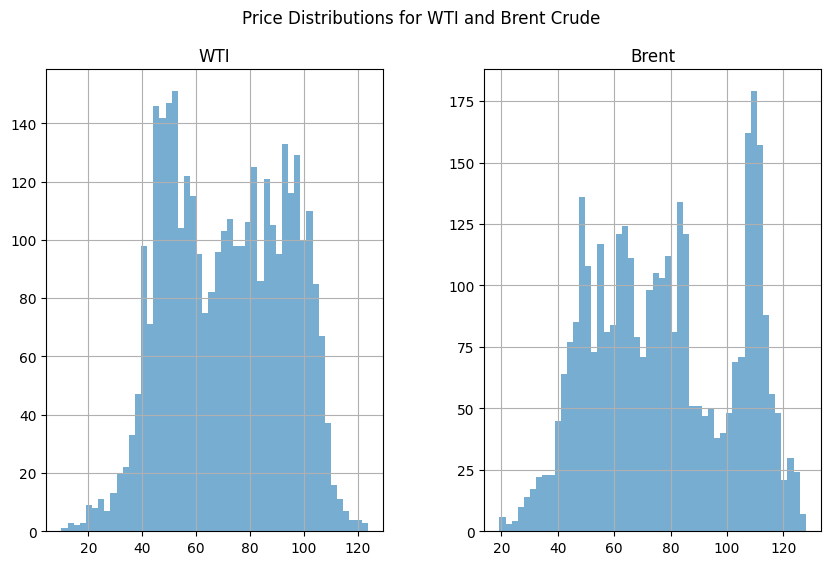

In [6]:
# Plot time series of WTI and Brent Crude
plt.figure(figsize=(10, 6))
for column in data_clean.columns:
    plt.plot(data_clean.index, data_clean[column], label=column)
plt.title('Historical Prices of WTI and Brent Crude')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()

print(data_clean.describe())
# Distribution (Histogram) of WTI and Brent prices
plt.figure(figsize=(10, 6))
data_clean.hist(bins=50, figsize=(10, 6), alpha=0.6)
plt.suptitle('Price Distributions for WTI and Brent Crude')
plt.show()


# Step 4: Correlation Analysis

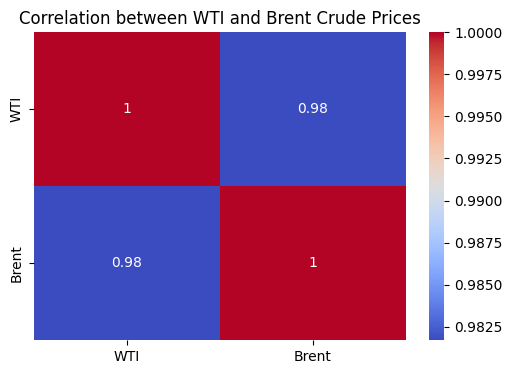

In [7]:
correlation_matrix = data_clean.corr()
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation between WTI and Brent Crude Prices')
plt.show()

# Step 5: Principal Component Analysis (PCA)

Explained Variance by Components: [0.99099315 0.00900685]


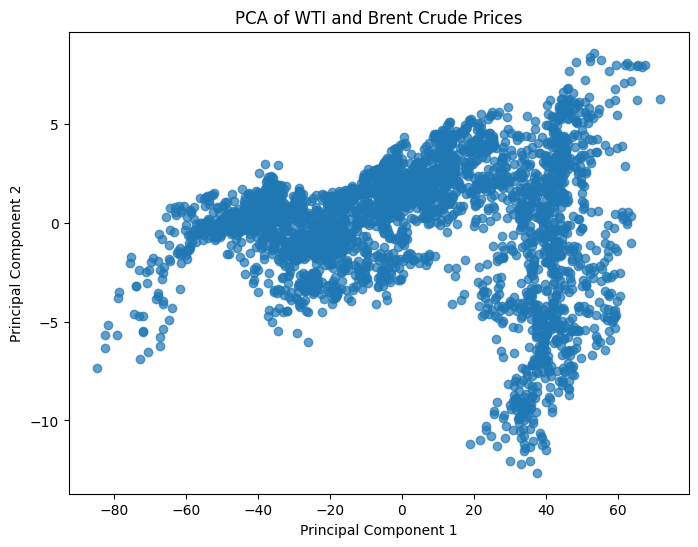

In [9]:
pca = PCA(n_components=2)
principal_components = pca.fit_transform(data_clean)
principal_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

explained_variance = pca.explained_variance_ratio_
print(f'Explained Variance by Components: {explained_variance}')

# Plot PCA Results
plt.figure(figsize=(8, 6))
plt.scatter(principal_components[:, 0], principal_components[:, 1], alpha=0.7)
plt.title('PCA of WTI and Brent Crude Prices')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()





 Step 6: ARIMA Model Fitting for WTI and Brent Crude

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=13108.247, Time=4.74 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=13105.517, Time=0.17 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=13105.741, Time=0.27 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=13105.642, Time=0.47 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=13103.537, Time=0.12 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=13108.125, Time=1.29 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 7.098 seconds


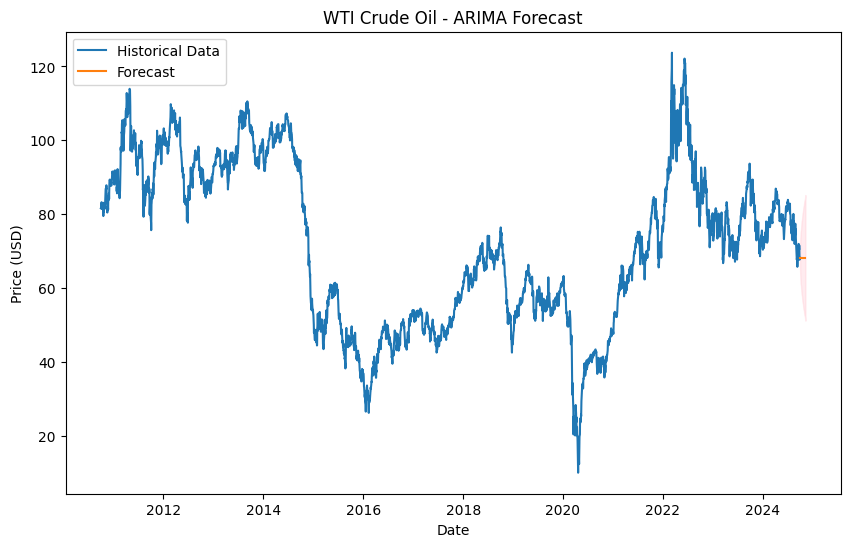

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=13136.693, Time=5.23 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=13141.105, Time=0.11 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=13142.072, Time=0.22 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=13141.999, Time=0.48 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=13139.122, Time=0.11 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=13141.635, Time=6.13 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=13141.882, Time=0.77 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=13145.711, Time=5.50 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=13138.427, Time=8.38 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=13140.076, Time=2.15 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=13139.577, Time=3.75 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=13139.732, Time=5.20 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=11.47 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=13134.710, Time=5.51 sec
 ARIMA(1,1,2)(0,0,0)[0] 

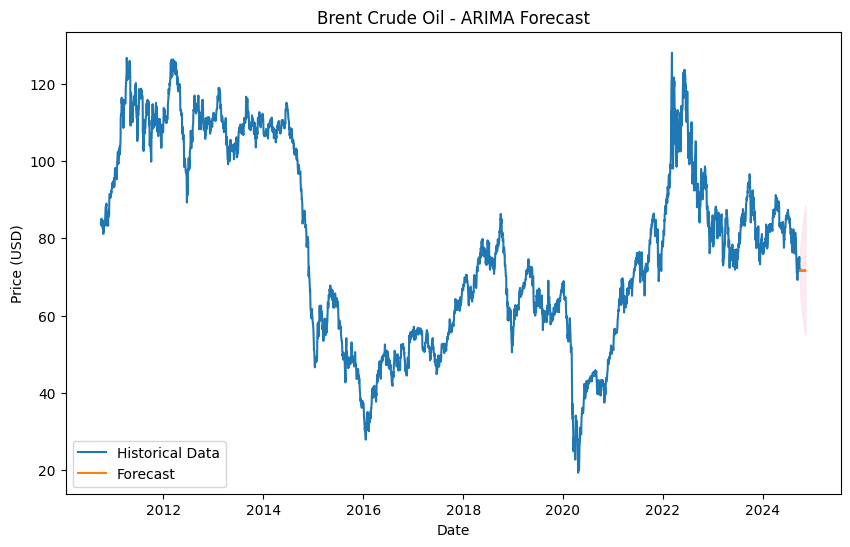


WTI ARIMA Model Summary:
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 3489
Model:               SARIMAX(0, 1, 0)   Log Likelihood               -6550.769
Date:                Tue, 01 Oct 2024   AIC                          13103.537
Time:                        15:53:39   BIC                          13109.695
Sample:                             0   HQIC                         13105.735
                               - 3489                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         2.5050      0.029     86.651      0.000       2.448       2.562
Ljung-Box (L1) (Q):                   1.78   Jarque-Bera (JB):              6564.99
Prob(Q):             

In [10]:
# ARIMA model for WTI
def fit_arima_model(data_series, title):
    # Automatically find the best ARIMA model
    arima_model = auto_arima(data_series, seasonal=False, trace=True, error_action='ignore', suppress_warnings=True)

    model_fit = arima_model.fit(data_series)

    forecast, conf_int = arima_model.predict(n_periods=30, return_conf_int=True)

    # Plot the actual and forecasted data
    plt.figure(figsize=(10, 6))
    plt.plot(data_series, label='Historical Data')
    plt.plot(pd.date_range(data_series.index[-1], periods=30, freq='B'), forecast, label='Forecast')
    plt.fill_between(pd.date_range(data_series.index[-1], periods=30, freq='B'),
                     conf_int[:, 0], conf_int[:, 1], color='pink', alpha=0.3)
    plt.title(f'{title} - ARIMA Forecast')
    plt.xlabel('Date')
    plt.ylabel('Price (USD)')
    plt.legend()
    plt.show()

    return model_fit

# Fit ARIMA model to WTI data
wti_model_fit = fit_arima_model(data_clean['WTI'], 'WTI Crude Oil')

# Fit ARIMA model to Brent Crude data
brent_model_fit = fit_arima_model(data_clean['Brent'], 'Brent Crude Oil')

# Print model summaries
print("\nWTI ARIMA Model Summary:")
print(wti_model_fit.summary())

print("\nBrent ARIMA Model Summary:")
print(brent_model_fit.summary())

Step 7: Comparative Analysis and Conclusion


===== Summary Statistics Comparison =====

               WTI        Brent
count  3489.000000  3489.000000
mean     71.547099    78.193726
std      21.934263    24.880118
min      10.010000    19.330000
25%      52.470001    57.389999
50%      71.779999    76.690002
75%      90.820000   103.160004
max     123.699997   127.980003

===== Correlation between WTI and Brent Crude =====

            WTI     Brent
WTI    1.000000  0.981696
Brent  0.981696  1.000000


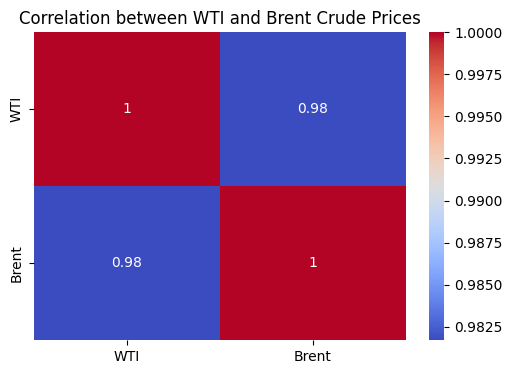


===== ARIMA Model Summary for WTI Crude Oil =====

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 3489
Model:               SARIMAX(0, 1, 0)   Log Likelihood               -6550.769
Date:                Tue, 01 Oct 2024   AIC                          13103.537
Time:                        16:10:30   BIC                          13109.695
Sample:                             0   HQIC                         13105.735
                               - 3489                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         2.5050      0.029     86.651      0.000       2.448       2.562
Ljung-Box (L1) (Q):                   1.78   Jarque-Bera (JB):              656

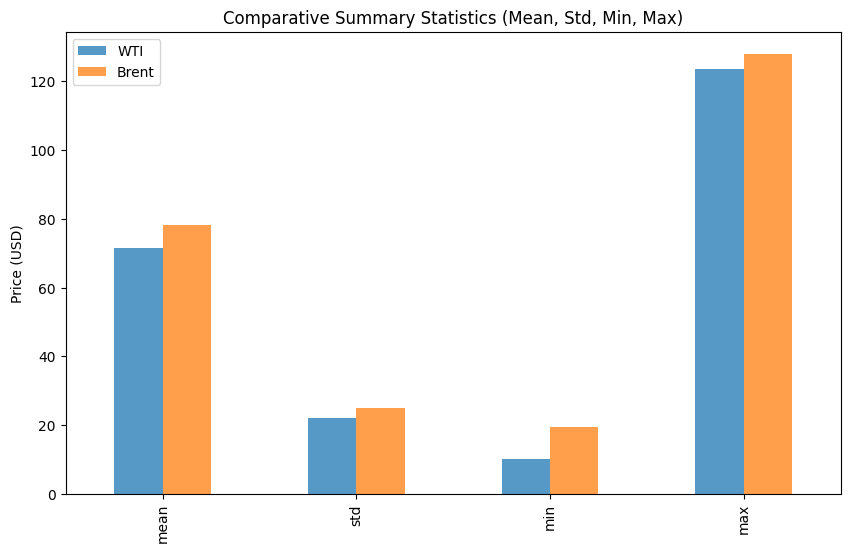


===== Conclusion =====
WTI ARIMA model has a lower AIC, indicating a better fit for the data compared to Brent.
WTI ARIMA model has a lower BIC, indicating a more parsimonious model compared to Brent.


In [12]:
# Comparing the Summary Statistics
print("===== Summary Statistics Comparison =====\n")
summary_stats = data_clean.describe()
print(summary_stats)

#Comparing the Correlation between WTI and Brent Crude
print("\n===== Correlation between WTI and Brent Crude =====\n")
correlation_matrix = data_clean.corr()
print(correlation_matrix)

# Visualize Correlation with a Heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation between WTI and Brent Crude Prices')
plt.show()

#Comparing the ARIMA Model Results

# Define a function to extract key ARIMA model metrics
def extract_arima_metrics(model, title):
    print(f"\n===== ARIMA Model Summary for {title} =====\n")
    print(model.summary())

    # Extract key metrics by calling the methods
    aic = model.aic()  # Call the aic() method to get the value
    bic = model.bic()  # Call the bic() method to get the value
    print(f"\nAIC for {title}: {aic}")
    print(f"BIC for {title}: {bic}")
    return aic, bic

wti_aic, wti_bic = extract_arima_metrics(wti_model_fit, 'WTI Crude Oil')
brent_aic, brent_bic = extract_arima_metrics(brent_model_fit, 'Brent Crude Oil')

# Creating a combined DataFrame for key summary statistics
summary_stats_comparison = pd.DataFrame({
    'WTI': summary_stats['WTI'],
    'Brent': summary_stats['Brent']
})

# Plot mean, std, min, max for WTI and Brent
summary_stats_comparison.loc[['mean', 'std', 'min', 'max']].plot(kind='bar', figsize=(10, 6), alpha=0.75)
plt.title('Comparative Summary Statistics (Mean, Std, Min, Max)')
plt.ylabel('Price (USD)')
plt.show()

#Making Conclusion based on AIC, BIC, and Statistics
print("\n===== Conclusion =====")
if wti_aic < brent_aic:
    print("WTI ARIMA model has a lower AIC, indicating a better fit for the data compared to Brent.")
else:
    print("Brent ARIMA model has a lower AIC, indicating a better fit for the data compared to WTI.")

if wti_bic < brent_bic:
    print("WTI ARIMA model has a lower BIC, indicating a more parsimonious model compared to Brent.")
else:
    print("Brent ARIMA model has a lower BIC, indicating a more parsimonious model compared to WTI.")